<a href="https://colab.research.google.com/github/thiagobg/bradr/blob/master/techsus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ffn

  Stored in directory: /root/.cache/pip/wheels/20/08/4d/921180e81279d147cb6399fe1e194f2c67a796df86f9f4c5fe
Successfully built ffn


In [0]:
import ffn as f

In [0]:
%matplotlib inline

In [8]:
data = f.get('GOOG, AMZN, AAPL, MSFT', start='2019-01-01', end='2019-07-01')
print(data.head())

                   goog         amzn        aapl        msft
Date                                                        
2019-01-02  1045.849976  1539.130005  156.642365  100.318642
2019-01-03  1016.059998  1500.280029  141.039642   96.628120
2019-01-04  1070.709961  1575.390015  147.060516  101.122223
2019-01-07  1068.390015  1629.510010  146.733185  101.251190
2019-01-08  1076.280029  1656.579956  149.530380  101.985329


In [0]:
returns = data.to_log_returns().dropna()

In [11]:
print(returns.head())

                goog      amzn      aapl      msft
Date                                              
2019-01-03 -0.028898 -0.025566 -0.104924 -0.037482
2019-01-04  0.052390  0.048851  0.041803  0.045460
2019-01-07 -0.002169  0.033776 -0.002228  0.001275
2019-01-08  0.007358  0.016476  0.018884  0.007225
2019-01-09 -0.001506  0.001713  0.016839  0.014198


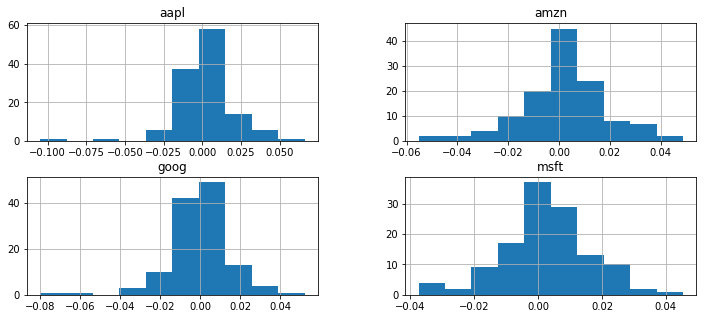

In [12]:
ax = returns.hist(figsize=(12, 5))

In [13]:
returns.corr().as_format('.2f')

,goog,amzn,aapl,msft
goog,1.00,0.72,0.56,0.63
amzn,0.72,1.00,0.61,0.73
aapl,0.56,0.61,1.00,0.65
msft,0.63,0.73,0.65,1.00


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

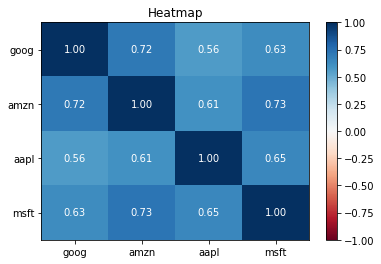

In [14]:
returns.plot_corr_heatmap()

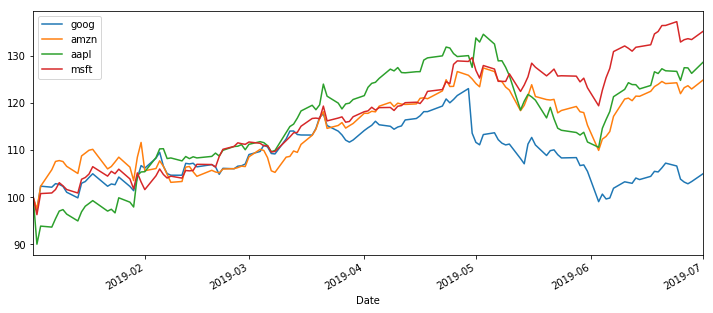

In [15]:
ax = data.rebase().plot(figsize=(12,5))

In [0]:
perf = data.calc_stats()

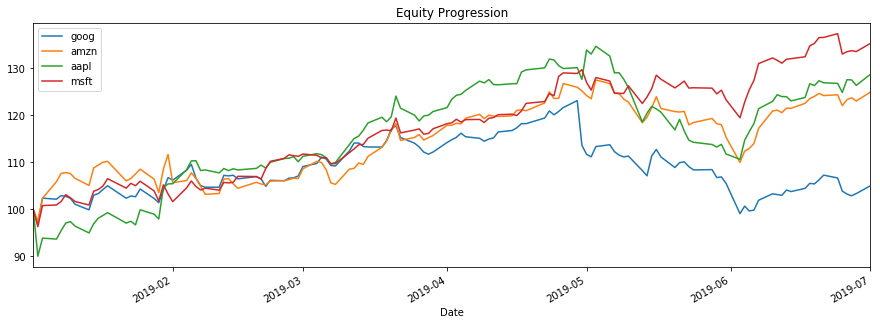

In [17]:
perf.plot()

In [19]:
print (perf.display())

Stat                 goog        amzn        aapl        msft
-------------------  ----------  ----------  ----------  ----------
Start                2019-01-02  2019-01-02  2019-01-02  2019-01-02
End                  2019-07-01  2019-07-01  2019-07-01  2019-07-01
Risk-free rate       0.00%       0.00%       0.00%       0.00%

Total Return         4.98%       24.89%      28.67%      35.25%
Daily Sharpe         0.52        1.83        1.89        2.91
Daily Sortino        0.77        3.10        2.97        5.20
CAGR                 10.37%      56.98%      66.78%      84.54%
Max Drawdown         -19.52%     -13.75%     -17.84%     -7.90%
Calmar Ratio         0.53        4.15        3.74        10.70

MTD                  1.58%       1.51%       1.83%       1.28%
3m                   -8.08%      5.95%       5.80%       14.42%
6m                   -           -           -           -
YTD                  4.98%       24.89%      28.67%      35.25%
1Y                   -           -      

In [0]:
import pandas as pd

In [0]:
import pandas_profiling as pf

In [23]:
pf.ProfileReport(data)

Number of variables,5
Number of observations,125
Total Missing (%),0.0%
Total size in memory,5.0 KiB
Average record size in memory,40.6 B
Numeric,3
Categorical,0
Boolean,0
Date,1
Text (Unique),0
Rejected,1
